In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

In [3]:
X_test = images[4992:6012]
y_test = masks[4992:6012]

In [4]:
images = images[0:4992]
masks = masks[0:4992]

In [5]:
images.shape

(4992, 512, 512, 1)

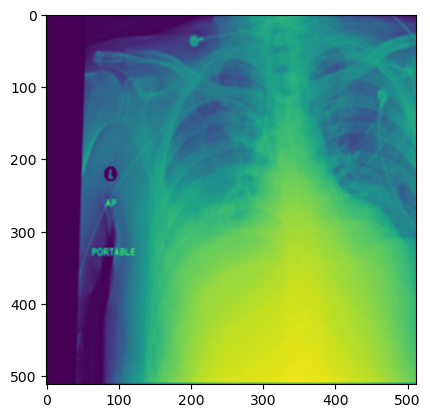

In [6]:
imshow(images[100])

In [7]:
masks.shape

(4992, 512, 512, 1)

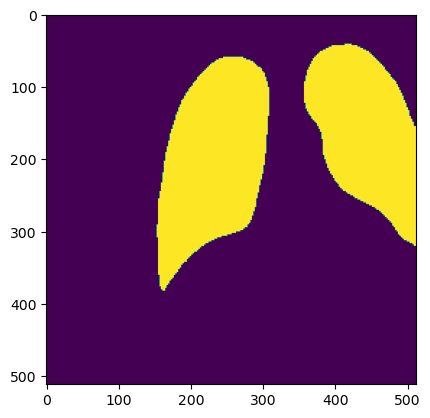

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpvge8e87ikuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpx5xfgtmmkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpx5xfgtmmkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_3_5_LungOpacity.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
16/16 [==============================] - 26s 1s/step - loss: 0.0440 - dice_coeff: 0.9461 - val_loss: 0.0280 - val_dice_coeff: 0.9607
Epoch 2/100
16/16 [==============================] - 8s 497ms/step - loss: 0.0278 - dice_coeff: 0.9620 - val_loss: 0.0258 - val_dice_coeff: 0.9655
Epoch 3/100
16/16 [==============================] - 8s 489ms/step - loss: 0.0219 - dice_coeff: 0.9698 - val_loss: 0.0232 - val_dice_coeff: 0.9685
Epoch 4/100
16/16 [==============================] - 8s 487ms/step - loss: 0.0195 - dice_coeff: 0.9737 - val_loss: 0.0233 - val_dice_coeff: 0.9702
Epoch 5/100
16/16 [==============================] - 8s 486ms/step - loss: 0.0178 - dice_coeff: 0.9752 - val_loss: 0.0233 - val_dice_coeff: 0.9729
Epoch 6/100
16/16 [==============================] - 8s 486ms/step - loss: 0.0160 - dice_coeff: 0.9779 - val_loss: 0.0233 - val_dice_coeff: 0.9733
Epoch 7/100
16/16 [==============================] - 8s 485ms/step - loss: 0

25/25 [==============================] - 10s 405ms/step - loss: 0.0051 - dice_coeff: 0.9931 - val_loss: 0.0501 - val_dice_coeff: 0.9768
Epoch 13/100
25/25 [==============================] - 10s 403ms/step - loss: 0.0050 - dice_coeff: 0.9933 - val_loss: 0.0516 - val_dice_coeff: 0.9764
Epoch 14/100
25/25 [==============================] - 10s 404ms/step - loss: 0.0048 - dice_coeff: 0.9935 - val_loss: 0.0552 - val_dice_coeff: 0.9768
Epoch 15/100
25/25 [==============================] - 10s 405ms/step - loss: 0.0048 - dice_coeff: 0.9936 - val_loss: 0.0513 - val_dice_coeff: 0.9765
Epoch 16/100
25/25 [==============================] - 10s 402ms/step - loss: 0.0050 - dice_coeff: 0.9932 - val_loss: 0.0540 - val_dice_coeff: 0.9765
Model saved to: /tmp/tmpx5xfgtmmkuc_unet2d/kuc_unet2d_3kuc_unet2d_model
History saved to: /tmp/tmpx5xfgtmmkuc_unet2d/kuc_unet2d_history_3.pkl
Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 31ms/step - loss: 5.5402e-0

In [16]:
R.classifier_scores

[[0.026535773649811745, 0.9723268747329712],
 [0.03471338748931885, 0.9746592044830322],
 [0.04439648985862732, 0.9758971333503723],
 [0.056029386818408966, 0.9756150841712952],
 [0.058521248400211334, 0.9758257865905762]]

In [17]:
R.discriminator_scores

[[5.521071216207929e-06, 1.0],
 [5.038653853262076e-06, 1.0],
 [1.2809487998310942e-05, 1.0],
 [5.5402065299858805e-06, 1.0],
 [5.696095740859164e-06, 1.0]]

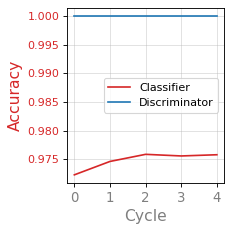

In [18]:
R.plot()

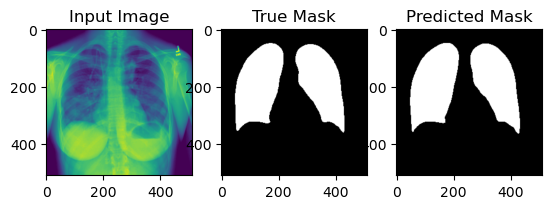

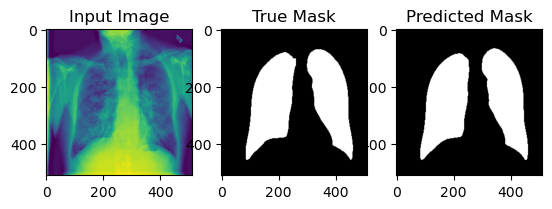

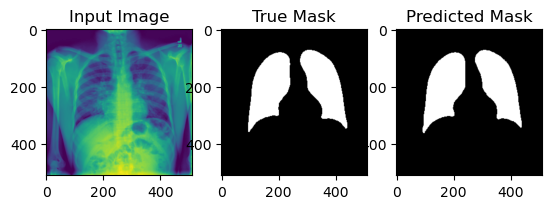

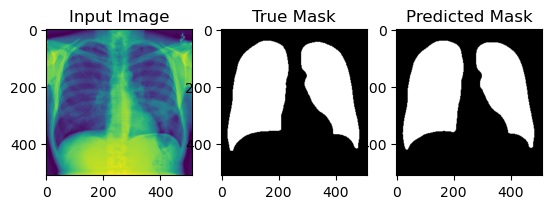

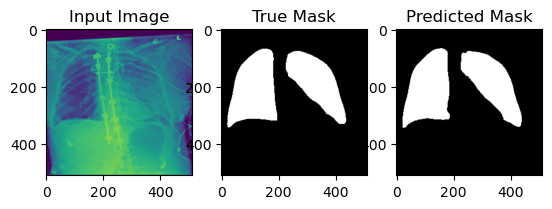

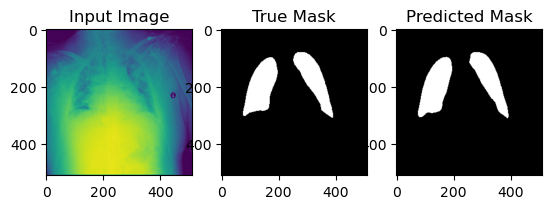

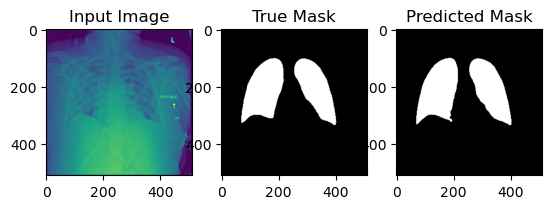

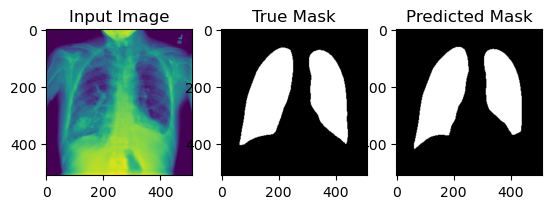

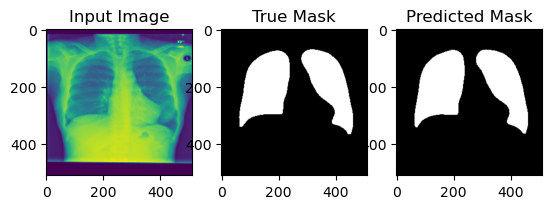

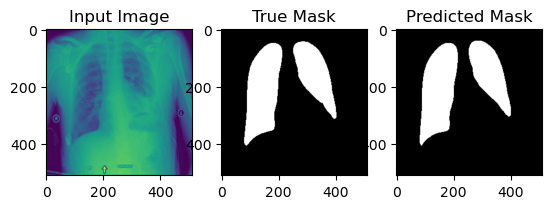

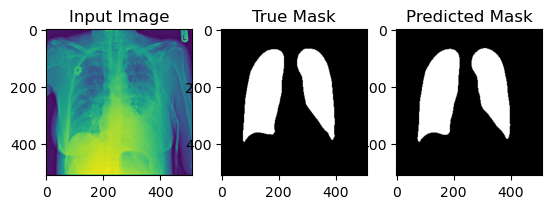

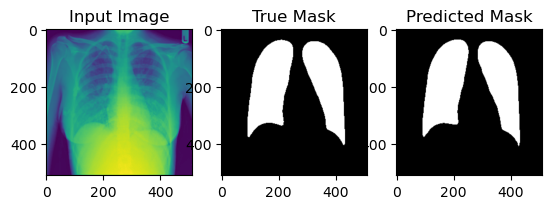

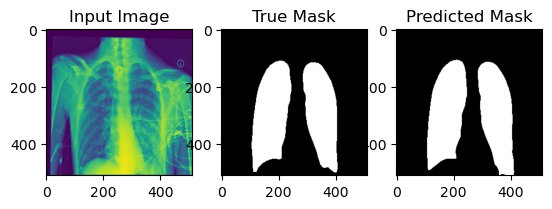

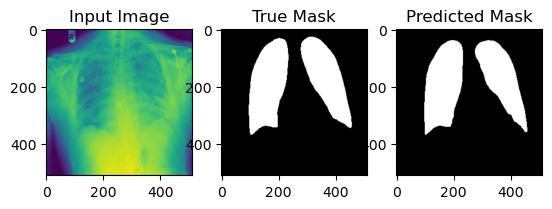

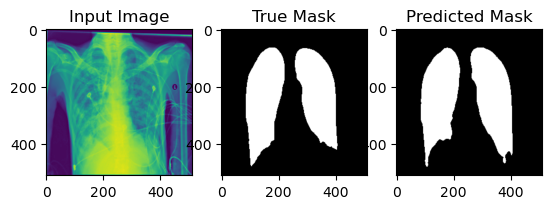

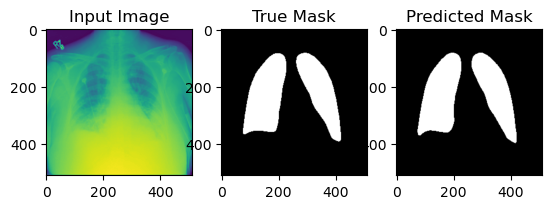

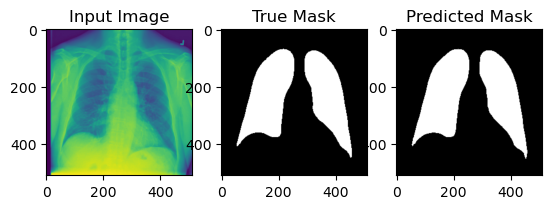

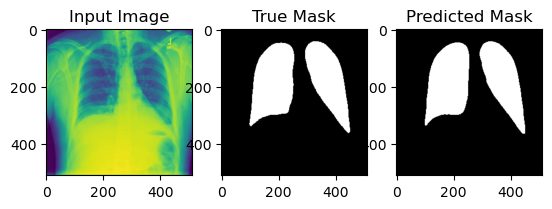

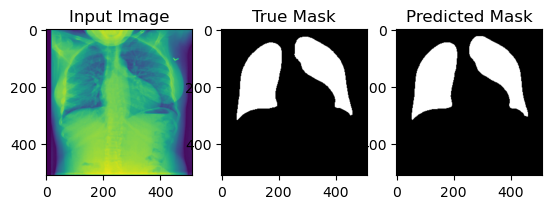

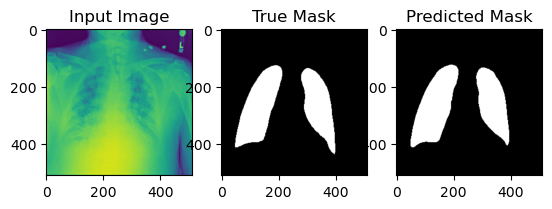

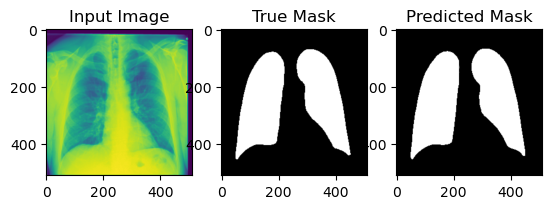

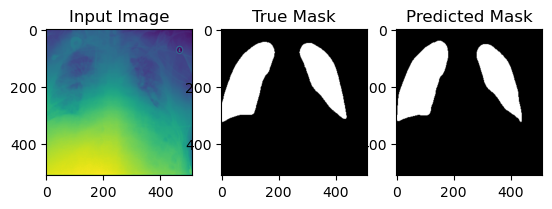

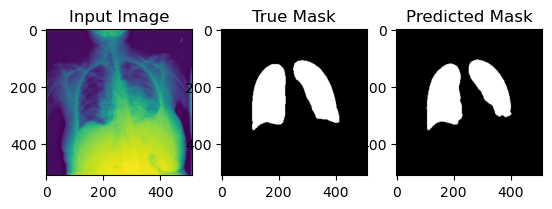

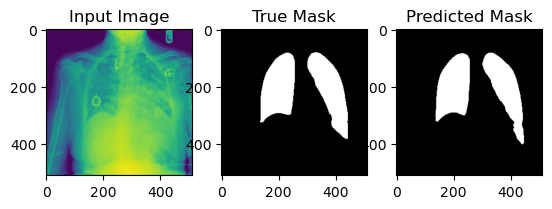

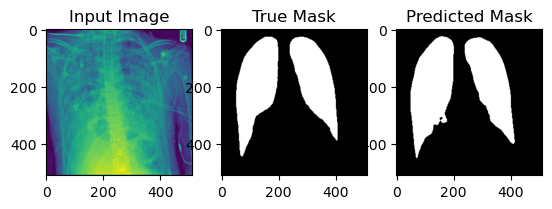

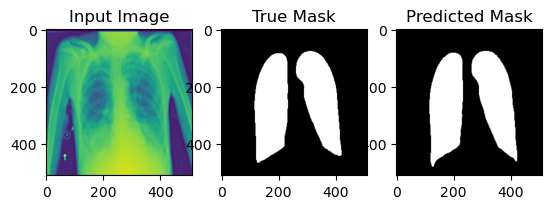

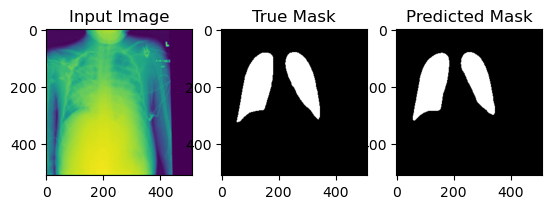

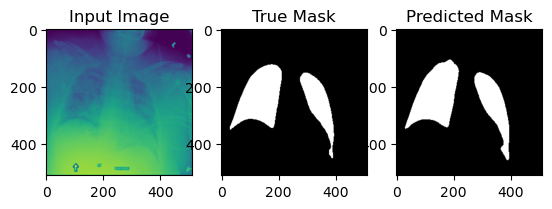

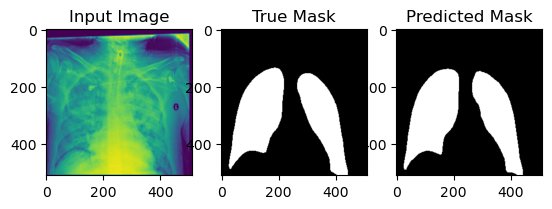

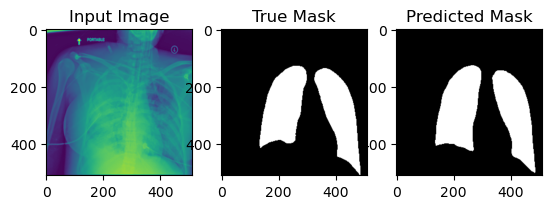

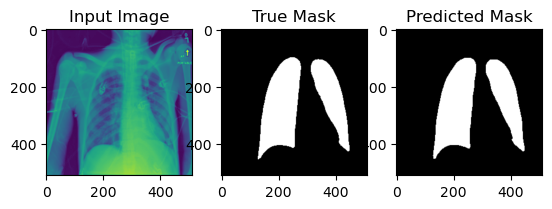

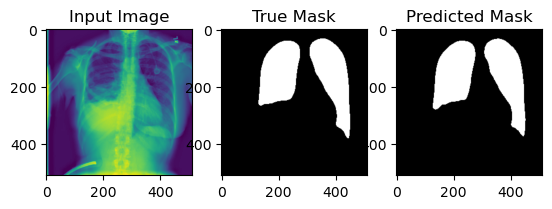

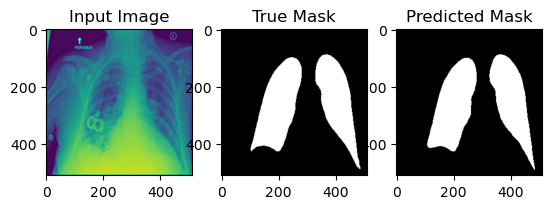

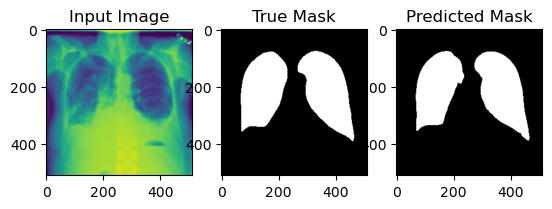

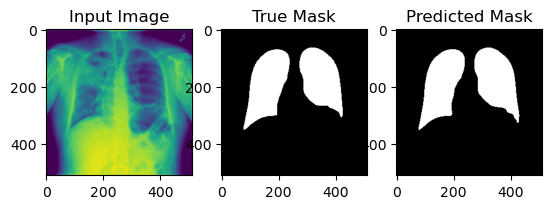

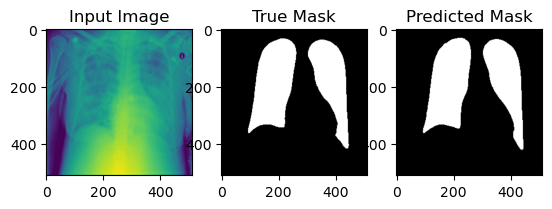

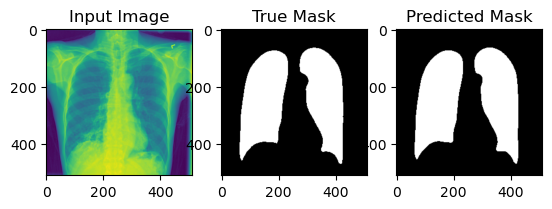

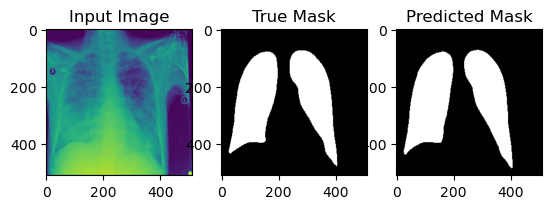

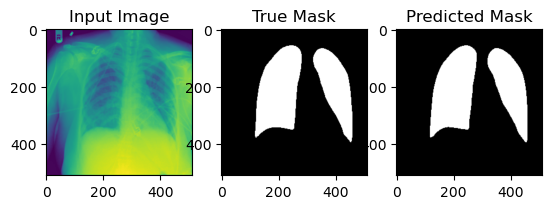

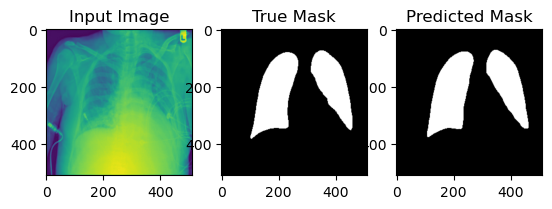

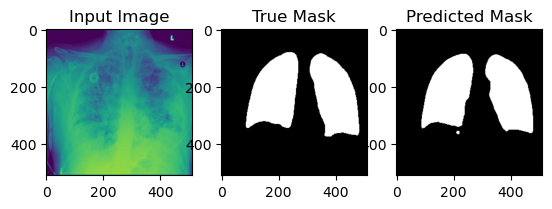

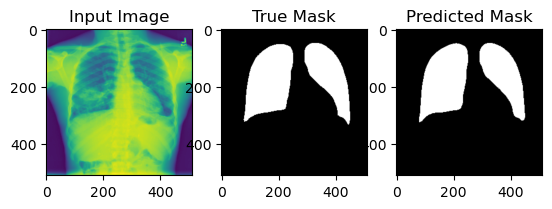

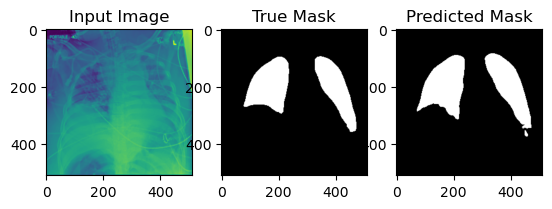

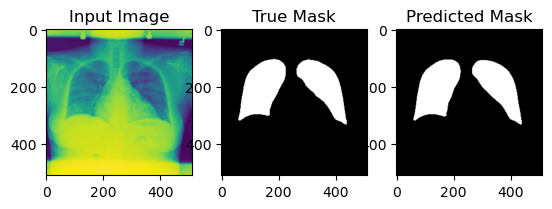

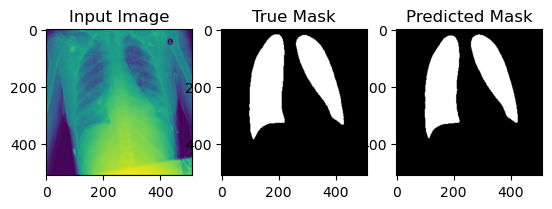

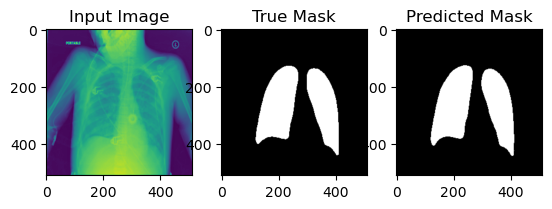

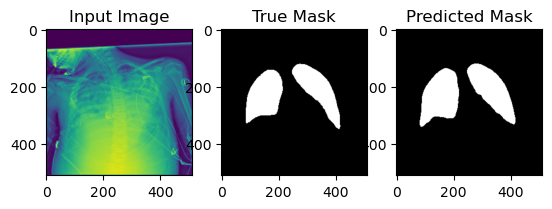

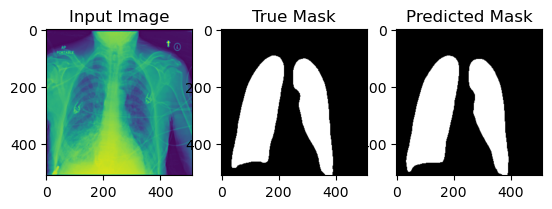

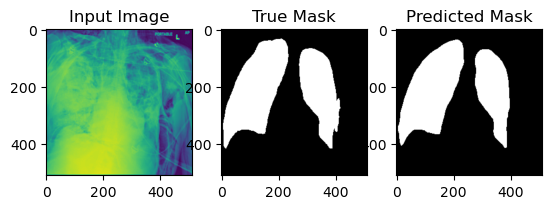

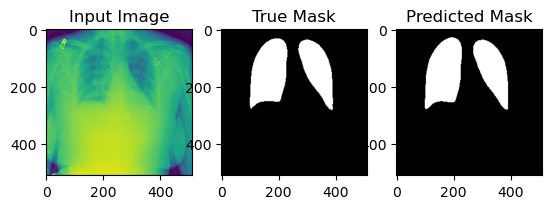

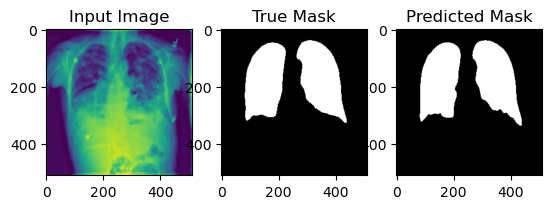

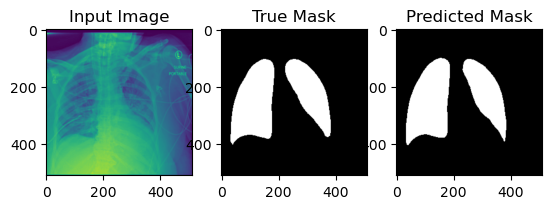

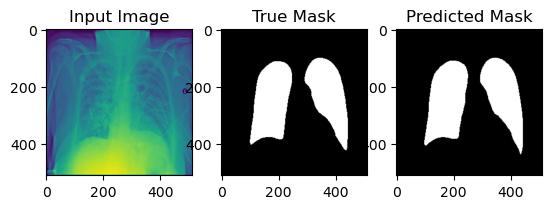

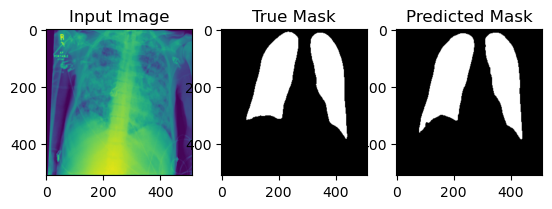

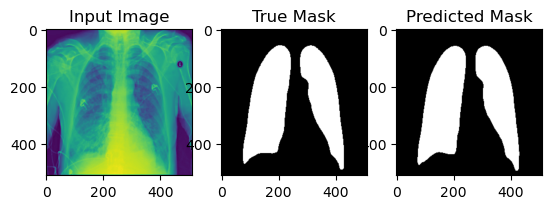

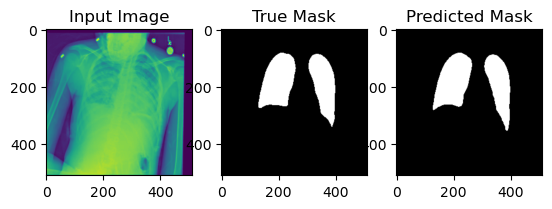

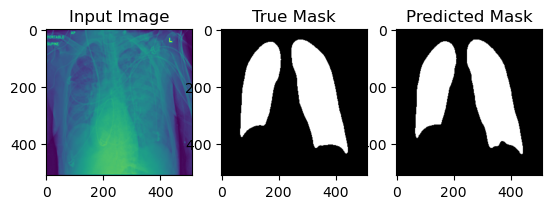

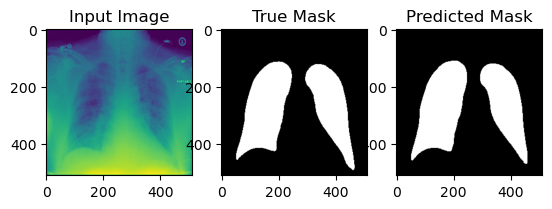

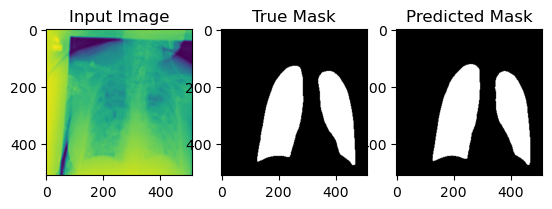

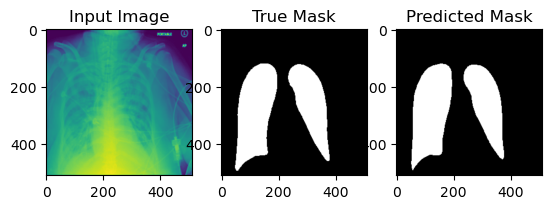

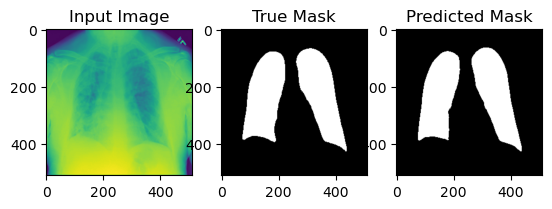

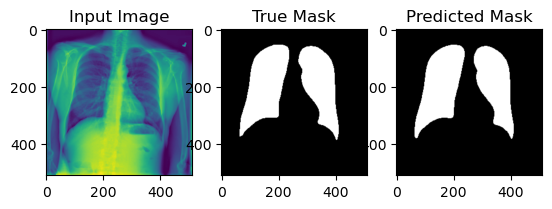

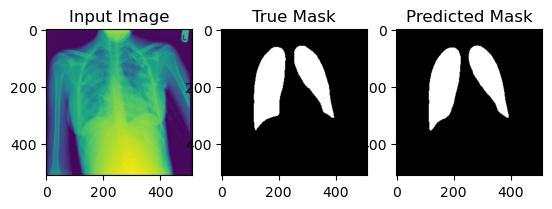

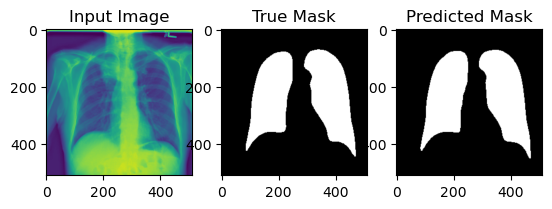

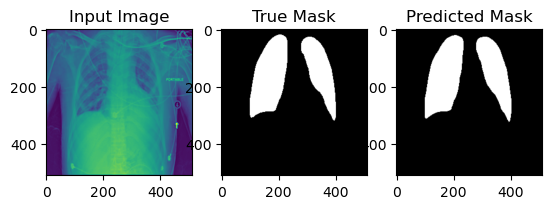

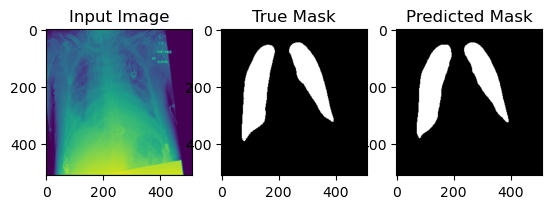

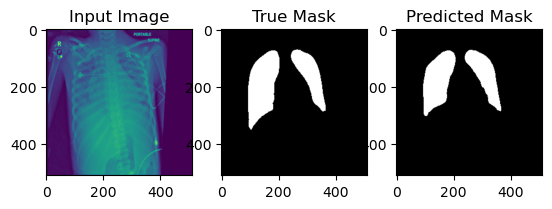

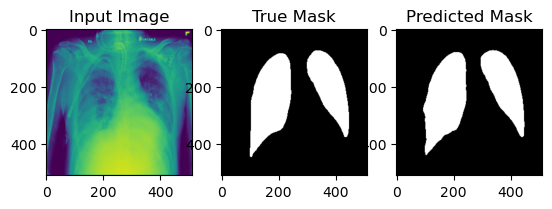

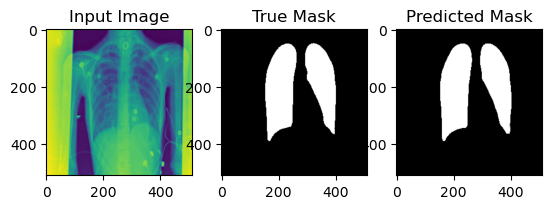

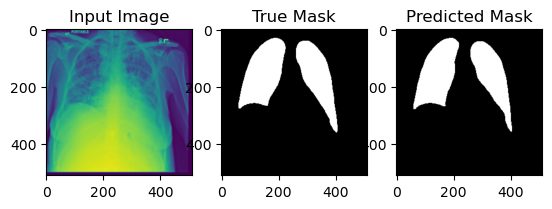

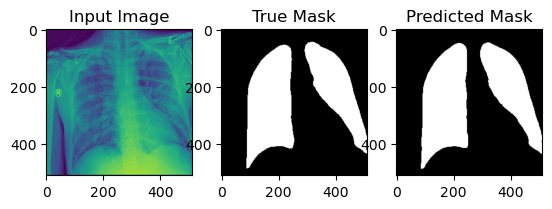

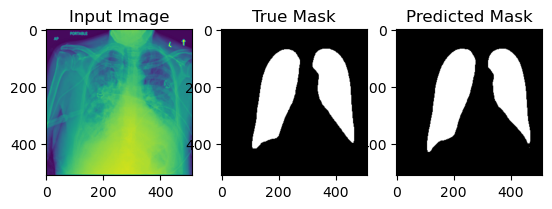

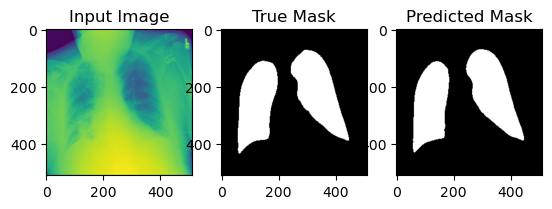

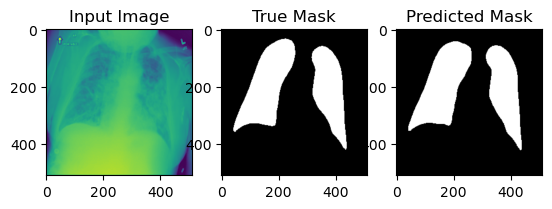

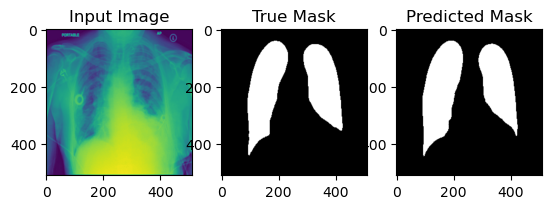

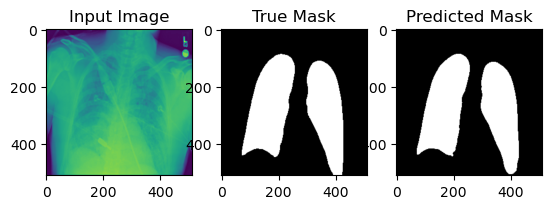

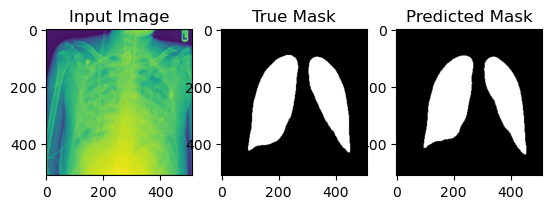

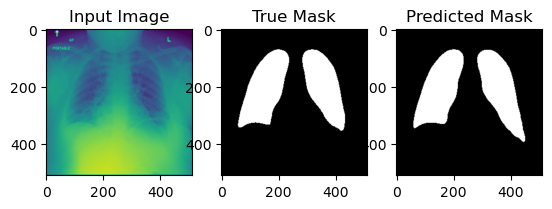

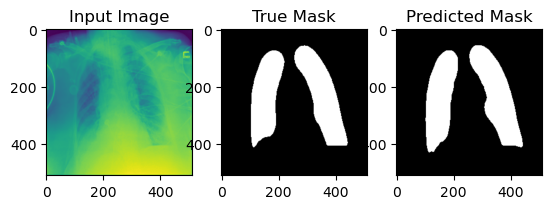

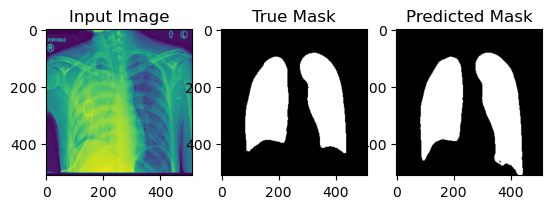

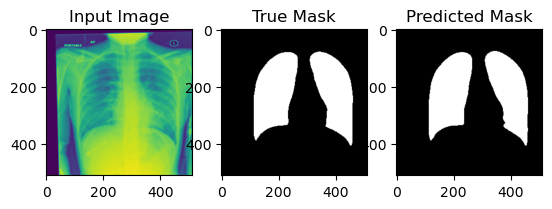

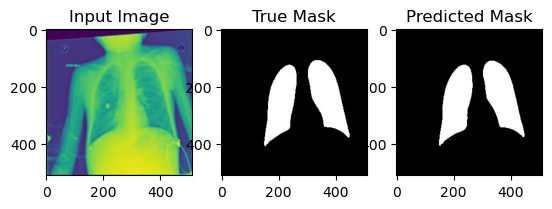

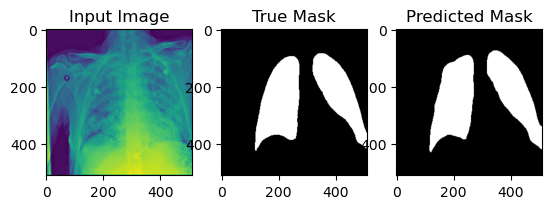

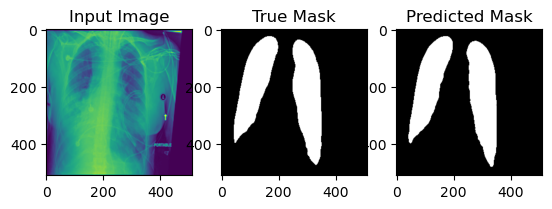

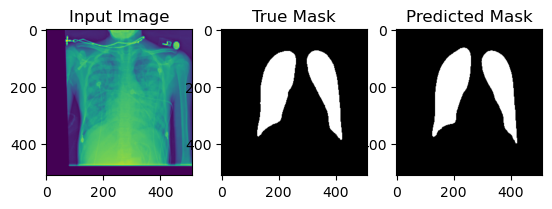

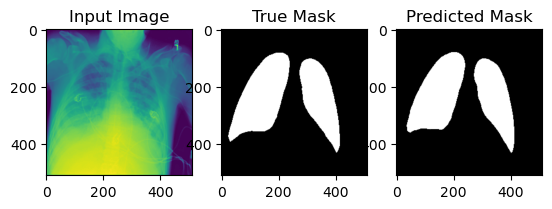

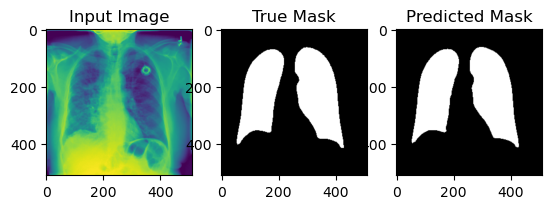

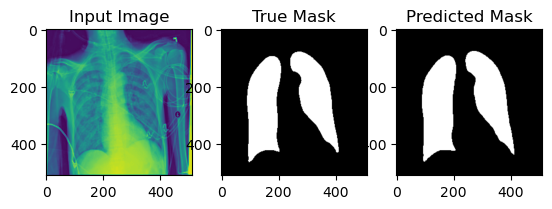

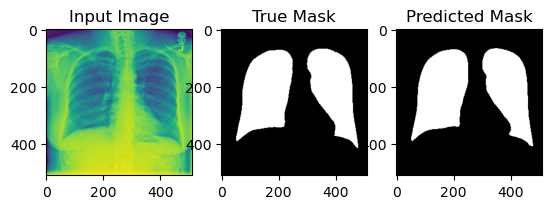

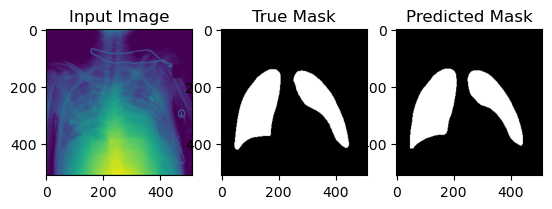

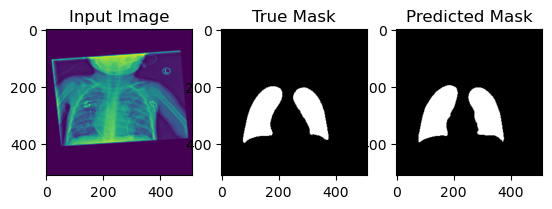

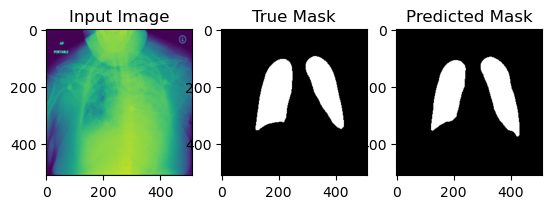

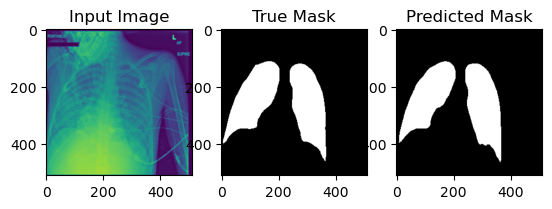

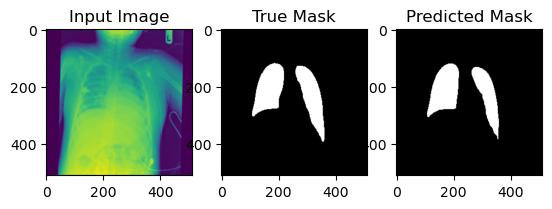

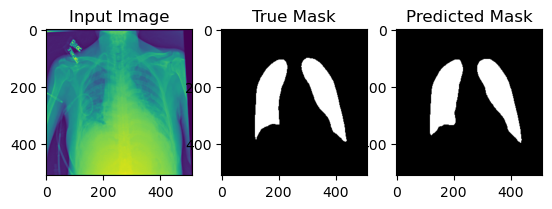

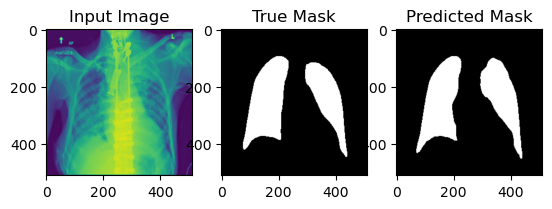

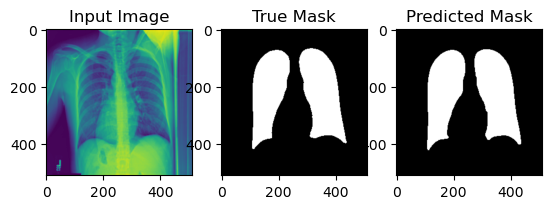

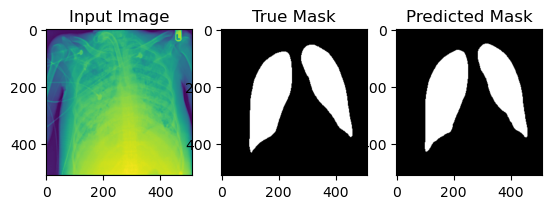

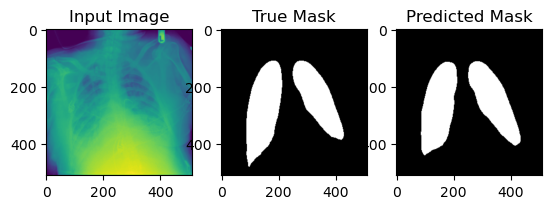

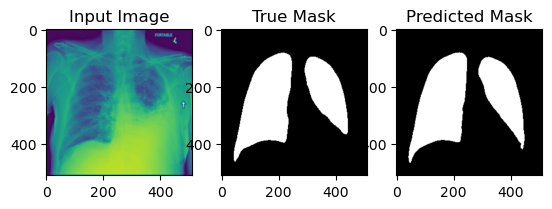

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpvge8e87ikuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpx5xfgtmmkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']